In [28]:
# import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Intro

- 굳이 Random data/내장 data set 을 여기 소개하는 이유는, Analysis 를 실습할 때에 데이터를 외부에서 직접 가져오는것 보다는 내장 데이터셋을 쓰는게 추후 재현성에 훨씬 좋고 또한 편리하기 때문이다.
- 그러므로 데이터 분석시에 random data 혹은 내장 데이터를 사용해서 분석을 진행하는것을 추천한다.

# Make classification data

`make_classification`함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
 * `n_redundant` : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
 * `n_repeated` : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
 * `n_classes` : 종속 변수의 클래스 수, 디폴트 2
 * `n_clusters_per_class` : 클래스 당 클러스터의 수, 디폴트 2
 * `weights` : 각 클래스에 할당된 표본 수
 * `random_state` : 난수 발생 시드    
  
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

## X 변수 1개/ y class 1개

In [29]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=1, # 독립변수는 X 하나
                           n_informative=1, # Y 변수와 관련되는 X변수의 수 X변수가 1개이므로 1보단 작아야한다.
                           n_redundant=0, # 독립변수중 다른 독립변수와 선형조합으로 나타나는 성분의 수 즉 X3= X1+3X2 
                           n_clusters_per_class=1, # 클래스당 클러스터의 수
                           random_state=4)

Text(0, 0.5, '$y$')

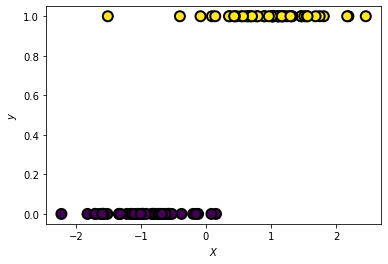

In [30]:
plt.scatter(X, y, marker='o', c=y, s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$y$")

## X변수 2개/y class 1개

x변수중 1개만 y class 에 연관되는 경우

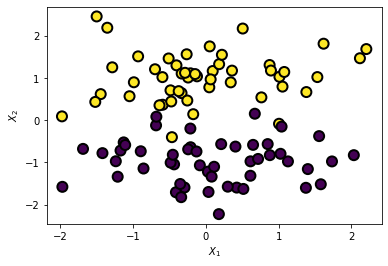

In [31]:
X, y = make_classification(n_features=2,  # 독립변수는 X1,X2 둘
                           n_informative=1, # Y 변수와 관련되는 X변수의 
                           n_redundant=0, # 독립변수중 다른 독립변수와 선형조합으로 나타나는 성분의 수 
                           n_clusters_per_class=1, 
                           random_state=4)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

x변수 2개가 모두 y class 에 연관되는 경우

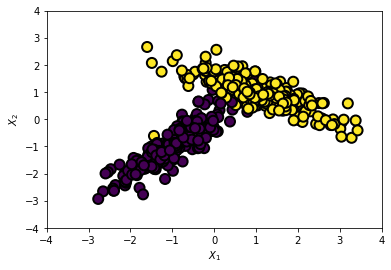

In [32]:
X, y = make_classification(n_samples=500, 
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1, 
                           random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$");

## class 별 데이터 갯수에 차이가 있는 경우

클래스 별 데이터의 갯수에 차이를 주고 싶을 땐, weights인수를 설정하면 된다. 이는 추후 배울 비대칭데이터를 시뮬레이션 할 때 사용할 것이다. 다음 코드에서는 weight인수를 각 각 0.9, 0.1로 설정 했다

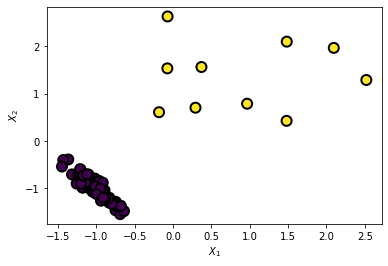

In [33]:
X, y = make_classification(n_features=2,  # 독립변수는 X1,X2 둘
                           n_informative=2, # Y 변수와 관련되는 X변수의 수
                           n_redundant=0, # 독립변수중 다른 독립변수와 선형조합으로 나타나는 성분의 수 
                           n_clusters_per_class=1, 
                           weights=[0.9, 0.1], # 데이터 별 클래스 갯수의 차이
                           random_state=6)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$") ;

## 클래스끼리 분리가 되지 않은 무작위 패턴

`n_clusters_per_class` 인수를 2로 설정하여, 클래스 당 클러스터 갯수를 늘리면 다음 코드의 결과 처럼 클래스 끼리 잘 분리되어 있지 않은 가상데이터를 얻을 수 있다. 클래스 당 클러스터 갯수를 설정할 때 주의 할 점은 $\text{n_classes} \times \text{n_clusters_per_class}$ 는  $2^{\text{n_informative}}$보다 작거나 같도록 설정해야 한다는 것이다. 

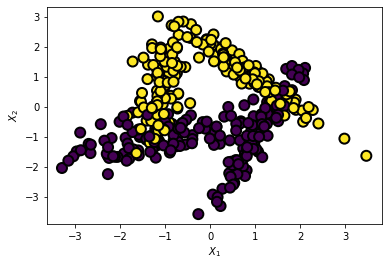

In [34]:
X2, Y2 = make_classification(n_samples=400, 
                             n_features=2, 
                             n_informative=2, 
                             n_redundant=0,
                             n_clusters_per_class=2, 
                             random_state=0)

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## y클래스가 n개 

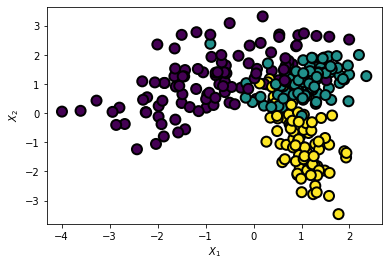

In [35]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## 가우시안 정규분포 가상데이터

`make_blobs` 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 다음 데이터 생성 코드의 결과를 보면 `make_classification` 함수로 만든 가상데이터와  모양이 다른 것을 확인 할 수 있다. `make_blobs`는 보통 클러스링 용 가상데이터를 생성하는데 사용한다. `make_blobs` 함수의 인수와 반환값은 다음과 같다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `centers` : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
 * `cluster_std`: 클러스터의 표준 편차, 디폴트 1.0
 * `center_box`: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0)) 
   
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

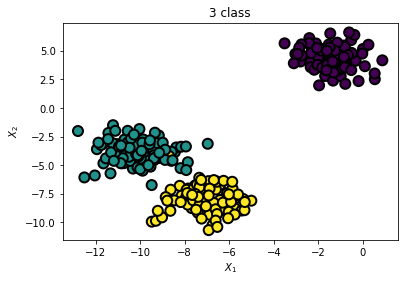

In [36]:
from sklearn.datasets import make_blobs

plt.title("3 class")
X, y = make_blobs(n_samples=300,
                  n_features=2, 
                  centers=3, 
                  random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## 초승달 모양 데이터

make_moons` 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. `make_moons` 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `noise`: 잡음의 크기. 0이면 정확한 반원을 이룸

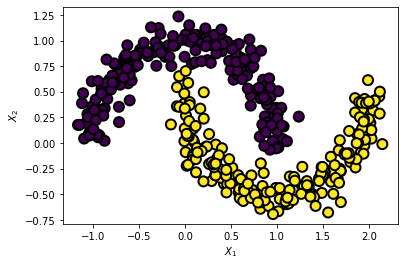

In [37]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=400, 
                  noise=0.1, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# Make Regression data

`make_regression()` 명령은 내부적으로 입력(독립 변수) 데이터인 $X$ 행렬, 잡음 $\epsilon$ 벡터, 계수 $w$ 벡터를 확률적으로 생성한 후, 위 관계식에 따라 출력(종속 변수) 데이터 $y$ 벡터를 계산하여 $X$, $y$ 값을 출력한다. 자세한 사용법은 다음과 같다.

```
X, y = make_regression(...)
```
또는
```
X, y, w = make_regression(..., coef=True, ...)
```

입력 인수는 다음과 같다.

 * `n_samples` : 정수 (옵션, 디폴트 100)
    * 표본 데이터의 갯수 $N$
 * `n_features` : 정수 (옵션, 디폴트 100)
    * 독립 변수(feature)의 수(차원) $M$
 * `n_targets` : 정수 (옵션, 디폴트 1)
    * 종속 변수(target)의 수(차원)
 * `bias` : 실수 (옵션, 디폴트 0.0)
    * y 절편
 * `noise` : 실수 (옵션, 디폴트 0.0)
    * 출력 즉, 종속 변수에 더해지는 잡음 $\epsilon$의 표준 편차
 * `coef` : 불리언 (옵션, 디폴트 False)
   * True 이면 선형 모형의 계수도 출력
 * `random_state` : 정수 (옵션, 디폴트 None)
   * 난수 발생용 시드값 
 * `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
 * `effective_rank`: 정수 또는 None (옵션, 디폴트 None)
    * 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
 * `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.  

출력은 다음과 같다.

 * `X` : [`n_samples`, `n_features`] 형상의 2차원 배열
    * 독립 변수의 표본 데이터 행렬 $X$
 * `y` : [`n_samples`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열
    * 종속 변수의 표본 데이터 벡터 $y$
 * `coef` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 (옵션)
    * 선형 모형의 계수 벡터 $w$, 입력 인수 `coef`가 True 인 경우에만 출력됨

## noise = 0 

In [38]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, 
                          n_features=1, 
                          bias=0, 
                          noise=0,
                          coef=True, 
                          random_state=0)

In [39]:
display(X, y ,w) 

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

array(79.17250381)

Text(0, 0.5, 'y')

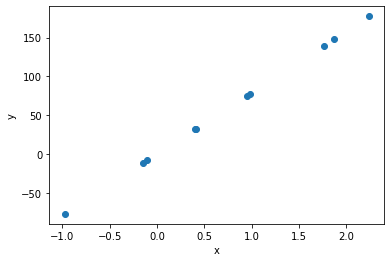

In [40]:
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")

## noise 가 있는 경우

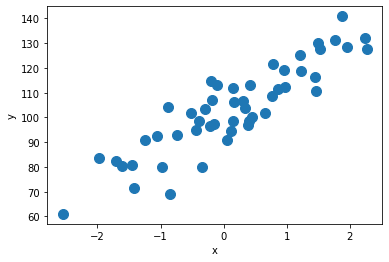

In [41]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## X1,X2 / 독립/ 둘다 Y 와 관련

`make_regression` 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

* `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
* `effective_rank`: 정수 또는 None (옵션, 디폴트 None)
    * 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
* `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.

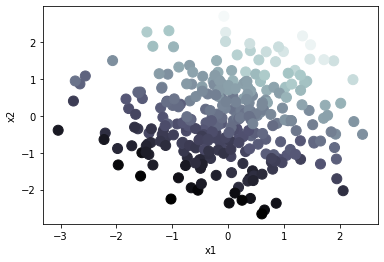

In [42]:
X, y, w = make_regression(n_samples=300, 
                          n_features=2,
                          noise=10,
                          coef=True, 
                          random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2") ;

## X1,X2 독립이 아닌 경우

만약 두 독립 변수가 서로 독립이 아니고 상관관계를 가지는 경우에는 tail_strength 인수를 0에 가까운 작은 값으로 설정한다. 

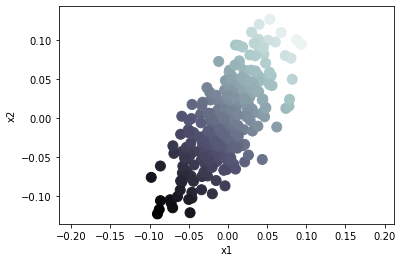

In [43]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0,
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

# 내장 분류 데이터셋

## iris 꽃 유형예측

붓꽃 데이터는 통계학자 피셔(R.A Fisher)의 붓꽃의 분류 연구에 기반한 데이터다. load_iris() 명령으로 로드한다. 데이터는 다음과 같이 구성되어 있다.

타겟 데이터
- setosa, versicolor, virginica의 세가지 붓꽃 종(species)

특징 데이터

- 꽃받침 길이(Sepal Length) 
- 꽃받침 폭(Sepal Width) 
- 꽃잎 길이(Petal Length) 
- 꽃잎 폭(Petal Width) 


In [44]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [45]:
# 이를 통해서 아래와 같이 정보들을 확인할 수 있다.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 와인 가격예측

와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터이다. load_wine() 명령으로 로드하며 다음과 같이 구성되어 있다.

타겟 데이터

- 와인의 종류 0, 1, 2의 세가지 값

특징 데이터

- 알콜(Alcohol)
- 말산(Malic acid)
- 회분(Ash)
- 회분의 알칼리도(Alcalinity of ash)
- 마그네슘(Magnesium)
- 총 폴리페놀(Total phenols)
- 플라보노이드 폴리페놀(Flavanoids)
- 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
- 프로안토시아닌(Proanthocyanins)
- 색상의 강도(Color intensity)
- 색상(Hue)
- 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
- 프롤린(Proline)


In [17]:
from sklearn.datasets import load_wine
wine = load_wine()

In [23]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, dtype="category")
sy = y.cat.rename_categories(wine.target_names)
df = X.copy()
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 유방암 진단 데이터

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [22]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, dtype="category")
df = X.copy()
sy = y.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


## 대표 수종 데이터
 

대표 수종 데이터는 미국 삼림을 30×30m 영역으로 나누어 각 영역의 특징으로부터 대표적인 나무의 종류(species of tree)을 예측하기위한 데이터이다. 수종은 7종류이지만 특징 데이터가 54종류, 표본 데이터의 갯수가 581,012개에 달하는 대규모 데이터이다.



In [30]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()

In [32]:
X = pd.DataFrame(covtype.data, 
                  columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])],
                  dtype=int)
y = covtype.target

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
pd.DataFrame(df.nunique()).T

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,covtype
0,1978,361,67,551,700,5785,207,185,255,5827,...,2,2,2,2,2,2,2,2,2,7


In [29]:
df.iloc[:, 10:54] = df.iloc[:, 10:54].astype('category')

# 내장 데이터셋

from sklearn.model_selection import train_test_split <br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 보스턴 집값예측

타겟 데이터
- 1978 보스턴 주택 가격
- 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

데이터 특징
- 회귀분석에 이용할 수 있다.
- categorical 이 하나도 없음
- 곁측치도 하나도 없다.
- (506,14) 의 데이터

In [37]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston() 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1)
df.tail()
y = boston.target #많은 모델들이 y 는 1dim 을 기대할떄가 많아서

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
df.info()
#print(boston.DESCR) 를 하면 정보를 더 볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 캘리포니아 집값예측

타겟 데이터
- 1990년 캘리포니아의 각 행정 구역 내 주택 가격의 중앙값

특징 데이터
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도

데이터 특징
- 곁측치가 없는 회귀 데이터 
- (20640, 9)

In [36]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target,columns=["Target"])
df = pd.concat([X, y], axis=1)
df.tail()
y = california.target

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 당뇨병 진행률 예측

442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

타겟 데이터
- 1년 뒤 측정한 당뇨병의 진행률

특징 데이터 (이 데이터셋의 특징 데이터는 모두 정규화된 값이다.)
- Age
- Sex
- Body mass index
- Average blood pressure
- S1 (혈청 측정에 대한 6가지 특징값.)
- S2
- S3
- S4
- S5
- S6


데이터 특징 
- 곁측치가 없다.
- (441,11) 데이터

In [35]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
# print(diabetes.DESCR)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target,columns=["Target"])
df = pd.concat([X, y], axis=1)
df.tail()
y = diabetes.target

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## 타이타닉 생존 예측

In [5]:
from seaborn import load_dataset
titanic=load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## iris 데이터 꽃 유형예측

In [7]:
from seaborn import load_dataset
iris=load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 다이아몬드 가격예측

In [10]:
from seaborn import load_dataset
diamonds=load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Cars 데이터

In [2]:
from seaborn import load_dataset
Cars = load_dataset('mpg')
Cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Tip 데이터

In [4]:
from seaborn import load_dataset
tips = load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## planets 데이터

In [5]:
from seaborn import load_dataset
planet = load_dataset('planets')
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Reference

- https://datascienceschool.net/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
